# Proyek Klasifikasi Gambar: [Input Nama Dataset]
- **Nama:** Ahmad Zainul Mufid
- **Email:** ahmad.zainul.mufid.tik22@mhsw.pnj.ac.id
- **ID Dicoding:** ahmad_zainul_mufid

## Import Semua Packages/Library yang Digunakan

In [1]:
from google.colab import drive
import zipfile, os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np

## Data Preparation

### Data Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
local_zip = '/content/drive/MyDrive/dataset/dogvscat.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/')
zip_ref.close()

### Data Preprocessing

#### Split Dataset

In [4]:
base_dir = '/content/dataset'
train_dir = os.path.join(base_dir, 'training_set')
validation_dir = os.path.join(base_dir, 'test_set')

In [5]:
os.listdir(train_dir)

['dogs', 'cats']

In [6]:
os.listdir(validation_dir)

['dogs', 'cats']

In [7]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2,
    validation_split=0.2,
    fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)


Found 6400 images belonging to 2 classes.


In [8]:
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

test_datagen = ImageDataGenerator(rescale=1.0/255)
test_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 1600 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


## Modelling

In [10]:
from tensorflow.keras.layers import BatchNormalization, Input

model = Sequential([
    Input(shape=(150, 150, 3)),
    Conv2D(32, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Conv2D(256, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 148, 148, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 72, 72, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 34, 34, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 15, 15, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,996,225 (7.61 MB)

 Trainable params: 1,995,265 (7.61 MB)

 Non-trainable params: 960 (3.75 KB)

In [12]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [13]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if logs.get('accuracy') > 0.95 and logs.get('val_accuracy') > 0.95:
          print("\nAkurasi minimum sudah tercapai (95%), training dihentikan!")
          self.model.stop_training = True

In [14]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)

In [15]:
num_epochs = 50
history = model.fit(
      train_generator,
      epochs=num_epochs,
      validation_data=validation_generator,
      validation_steps=len(validation_generator),
      verbose=2,
      callbacks=[early_stopping, reduce_lr])

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
200/200 - 64s - 319ms/step - accuracy: 0.6386 - loss: 0.7173 - val_accuracy: 0.4994 - val_loss: 1.2459 - learning_rate: 1.0000e-03
Epoch 2/50
200/200 - 51s - 255ms/step - accuracy: 0.6878 - loss: 0.5943 - val_accuracy: 0.6156 - val_loss: 0.6682 - learning_rate: 1.0000e-03
Epoch 3/50
200/200 - 52s - 258ms/step - accuracy: 0.7291 - loss: 0.5292 - val_accuracy: 0.7219 - val_loss: 0.5441 - learning_rate: 1.0000e-03
Epoch 4/50
200/200 - 52s - 259ms/step - accuracy: 0.7581 - loss: 0.5033 - val_accuracy: 0.7044 - val_loss: 0.5681 - learning_rate: 1.0000e-03
Epoch 5/50
200/200 - 51s - 254ms/step - accuracy: 0.7722 - loss: 0.4814 - val_accuracy: 0.7350 - val_loss: 0.5357 - learning_rate: 1.0000e-03
Epoch 6/50
200/200 - 51s - 254ms/step - accuracy: 0.7850 - loss: 0.4495 - val_accuracy: 0.7237 - val_loss: 0.5904 - learning_rate: 1.0000e-03
Epoch 7/50
200/200 - 51s - 257ms/step - accuracy: 0.8041 - loss: 0.4300 - val_accuracy: 0.7581 - val_loss: 0.4950 - learning_rate: 1.0000e-03
Epoch 

## Evaluasi dan Visualisasi

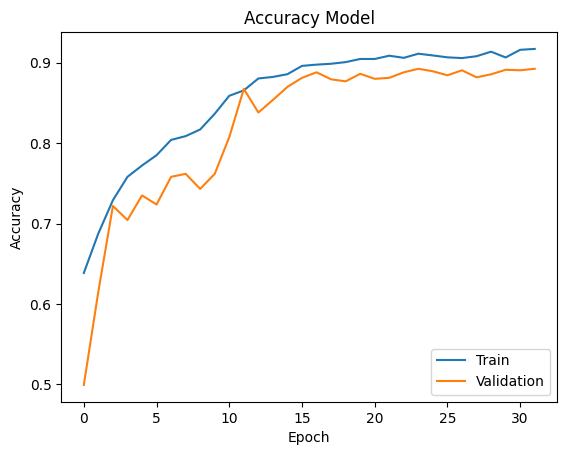

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy Model")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(['Train', 'Validation'],loc='lower right')
plt.show()

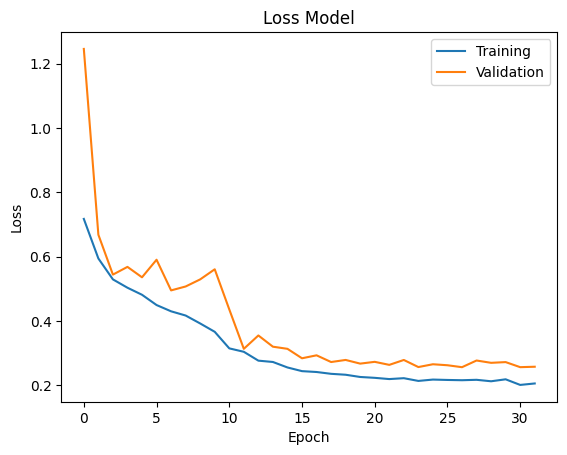

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['Training','Validation' ],loc='upper right')
plt.show()

Saving cat.png to cat.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 814ms/step
cat.png
Cat


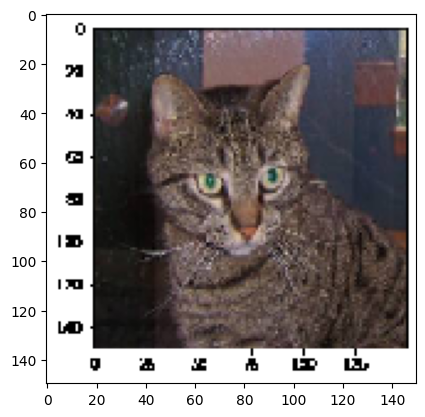

In [19]:
from google.colab import files
from keras.preprocessing import image
import matplotlib.image as mpimg

uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)


  print(fn)
  if classes[0,0]!=0:
    print('Dog')
  else:
    print('Cat')

Saving dog.png to dog.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
dog.png
Cat


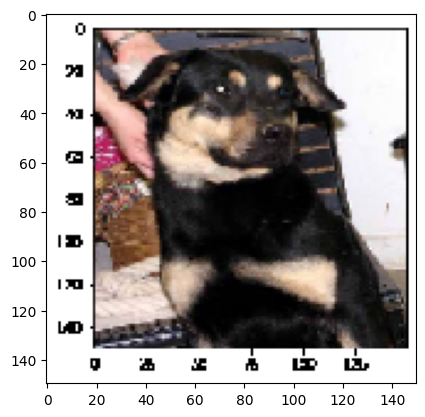

In [20]:
uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)


  print(fn)
  if classes[0,0]!=0:
    print('Dog')
  else:
    print('Cat')

## Konversi Model

In [21]:
export_dir = 'saved_model/'
tf.saved_model.save(model, export_dir)
print("Model berhasil disimpan dalam format SavedModel!")

Model berhasil disimpan dalam format SavedModel!


In [22]:
# Konversi ke TFLite
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)

# optimasi agar model lebih ringan
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Simpan hasil konversi
tflite_model = converter.convert()

import pathlib
tflite_model_file = pathlib.Path('model.tflite')
tflite_model_file.write_bytes(tflite_model)

print("Model berhasil disimpan dalam format TFLite!")

Model berhasil disimpan dalam format TFLite!


In [26]:
model.save("model.h5")  # Simpan sebagai file HDF5

In [27]:
!pip install tensorflowjs

In [1]:
from tensorflow.keras.models import load_model

model = load_model("model.h5")


In [2]:
import tensorflowjs as tfjs

tfjs_target_dir = "tfjs_model"
tfjs.converters.save_keras_model(model, tfjs_target_dir)

print("Model berhasil disimpan dalam format TensorFlow.js!")

failed to lookup keras version from the file,
    this is likely a weight only file
Model berhasil disimpan dalam format TensorFlow.js!


## Inference (Optional)

In [5]:
import tensorflow as tf
from keras.layers import TFSMLayer
import numpy as np

# Load model SavedModel menggunakan TFSMLayer
model = TFSMLayer("saved_model/", call_endpoint="serving_default")

# Contoh input gambar (dummy input)
sample_input = np.random.rand(1, 150, 150, 3).astype(np.float32)

# Melakukan prediksi
prediction = model(sample_input)
print("Prediksi Model SavedModel:", prediction)

Prediksi Model SavedModel: {'output_0': <tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.82545644]], dtype=float32)>}


In [15]:
# Konversi ke TFLite
export_dir = 'saved_model/'  # Define export_dir with the path to your SavedModel

# Load the Keras model (from the .h5 file if available)
from tensorflow.keras.models import load_model
model = load_model('model.h5')  # Replace 'model.h5' with the correct path if needed

# Use `from_keras_model` with the `model` object
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# optimasi agar model lebih ringan
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Remove or set to False to use the old converter
converter._experimental_disable_conversion = False

# Simpan hasil konversi
tflite_model = converter.convert()

import pathlib
tflite_model_file = pathlib.Path('model.tflite')
tflite_model_file.write_bytes(tflite_model)

print("Model berhasil disimpan dalam format TFLite!")

Saved artifact at '/tmp/tmp3mfcx7e5'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  134291771232464: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134291771241680: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134291771241296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134291771241872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134291771241488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134291771242640: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134291771240528: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134291771239184: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134291771239760: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134291771238608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134291771239952

In [16]:
import tensorflow as tf
import numpy as np

# Load model TFLite
interpreter = tf.lite.Interpreter(model_path="model.tflite")
interpreter.allocate_tensors()

# Dapatkan detail input dan output
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Contoh input gambar (sesuaikan dengan dataset)
sample_input = np.random.rand(1, 150, 150, 3).astype(np.float32)

# Set input tensor
interpreter.set_tensor(input_details[0]['index'], sample_input)

# Jalankan inference
interpreter.invoke()

# Ambil hasil output
output_data = interpreter.get_tensor(output_details[0]['index'])
print("Prediksi Model TFLite:", output_data)

Prediksi Model TFLite: [[0.8043204]]


/usr/local/lib/python3.11/dist-packages/tensorflow/lite/python/interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)
